In [5]:
import PyPDF2 as pdfpy
import pdf2image
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing PDF file

file = open('merged.pdf', 'rb')
pdf = pdfpy.PdfFileReader(file)
pages = [pdf.getPage(pageNumber) for pageNumber in range(pdf.numPages)]
images = pdf2image.convert_from_path('./merged.pdf')

In [3]:
pixels = np.asarray(images[0])
# Image.fromarray(pixels, 'RGB')

In [4]:
pixels.shape

(2202, 1664, 3)

In [5]:
pixels = np.int16(pixels)

In [6]:
pixels.dtype

dtype('int16')

In [7]:
pixels[0][1] == np.asarray([255, 255, 255])

array([ True,  True,  True])

In [8]:
pixelsDict = {
    'x':[],
    'y':[],
    'R':[],
    'G':[],
    'B':[]
    }

for y in range(len(pixels)):
    for x in range(len(pixels[y])):
        r, g, b = pixels[y][x][0], pixels[y][x][1], pixels[y][x][2]
        pixelsDict['x'].append(x)
        pixelsDict['y'].append(y)
#         pixelsDict['RGB'].append(np.array(pixels[y][x]))        
        pixelsDict['R'].append(np.array(pixels[y][x][0]))
        pixelsDict['G'].append(np.array(pixels[y][x][1]))        
        pixelsDict['B'].append(np.array(pixels[y][x][2]))   

# pixelsDf = pd.DataFrame.from_dict({'R': pixelsDict['R']})
pixelsDf = pd.DataFrame.from_dict(pixelsDict)

In [9]:
plt.scatter(pixelsDf.x, pixels.shape[0] - pixelsDf.y, c=pixelsDf.RGB/255)

AttributeError: 'DataFrame' object has no attribute 'RGB'

In [ ]:
pixelsDf.shape

In [ ]:
pixelsDf.query("R == B == G").shape

In [11]:
# value of R,G and B is same in all columns so eliminating redundant columns

pixelsDf.drop(['G', "B"], axis=1, inplace=True)
pixelsDf.rename(columns={'R':'Color'}, inplace=True)

# Converting colors into 0 and 1 (0 black and 1 white)
pixelsDf['Color'] = np.int8(pixelsDf['Color']/128)

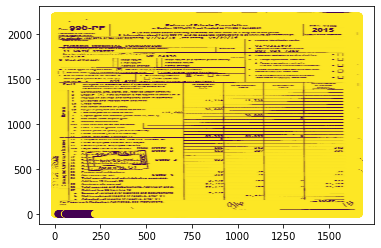

In [9]:
# Printing the pixels in matplotlib
plt.scatter(pixelsDf.x, pixels.shape[0] - pixelsDf.y, c=pixelsDf.Color)

<AxesSubplot:xlabel='Color', ylabel='count'>

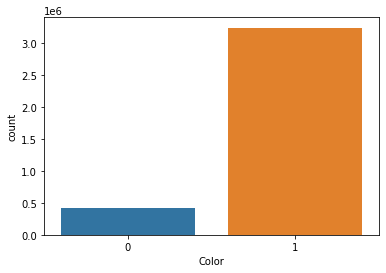

In [12]:
sns.countplot(data=pixelsDf, x='Color')

In [ ]:
yFromTop = 120
beg, end = pixels.shape[1]*yFromTop, pixels.shape[1]*(yFromTop+100)
plt.scatter(pixelsDf.x[beg:end], (pixels.shape[0] - pixelsDf.y)[beg:end], c=pixelsDf.Color[beg:end], s=0.09)

In [64]:
# (pixels.shape[0] - pixelsDf.y)[beg:end]
# x 
# [pixelsDf.query(f"x=={x} and y=={y}").Color*255 for i in range(3)]
# [int(pixelsDf.query(f"x=={x} and y=={y}").Color*255) for i in range(3)]
# pixelsDf.y[beg:end]


In [120]:
yFromTop = 120
beg, end = pixels.shape[1]*yFromTop, pixels.shape[1]*(yFromTop+100)

temp, y = [], 0
image = np.empty((pixels.shape[0], pixels.shape[1], 3),dtype=int)

for i, row in pixelsDf.iterrows():
    for j in range(3):
        image[row.y][row.x][j] = row.Color*255

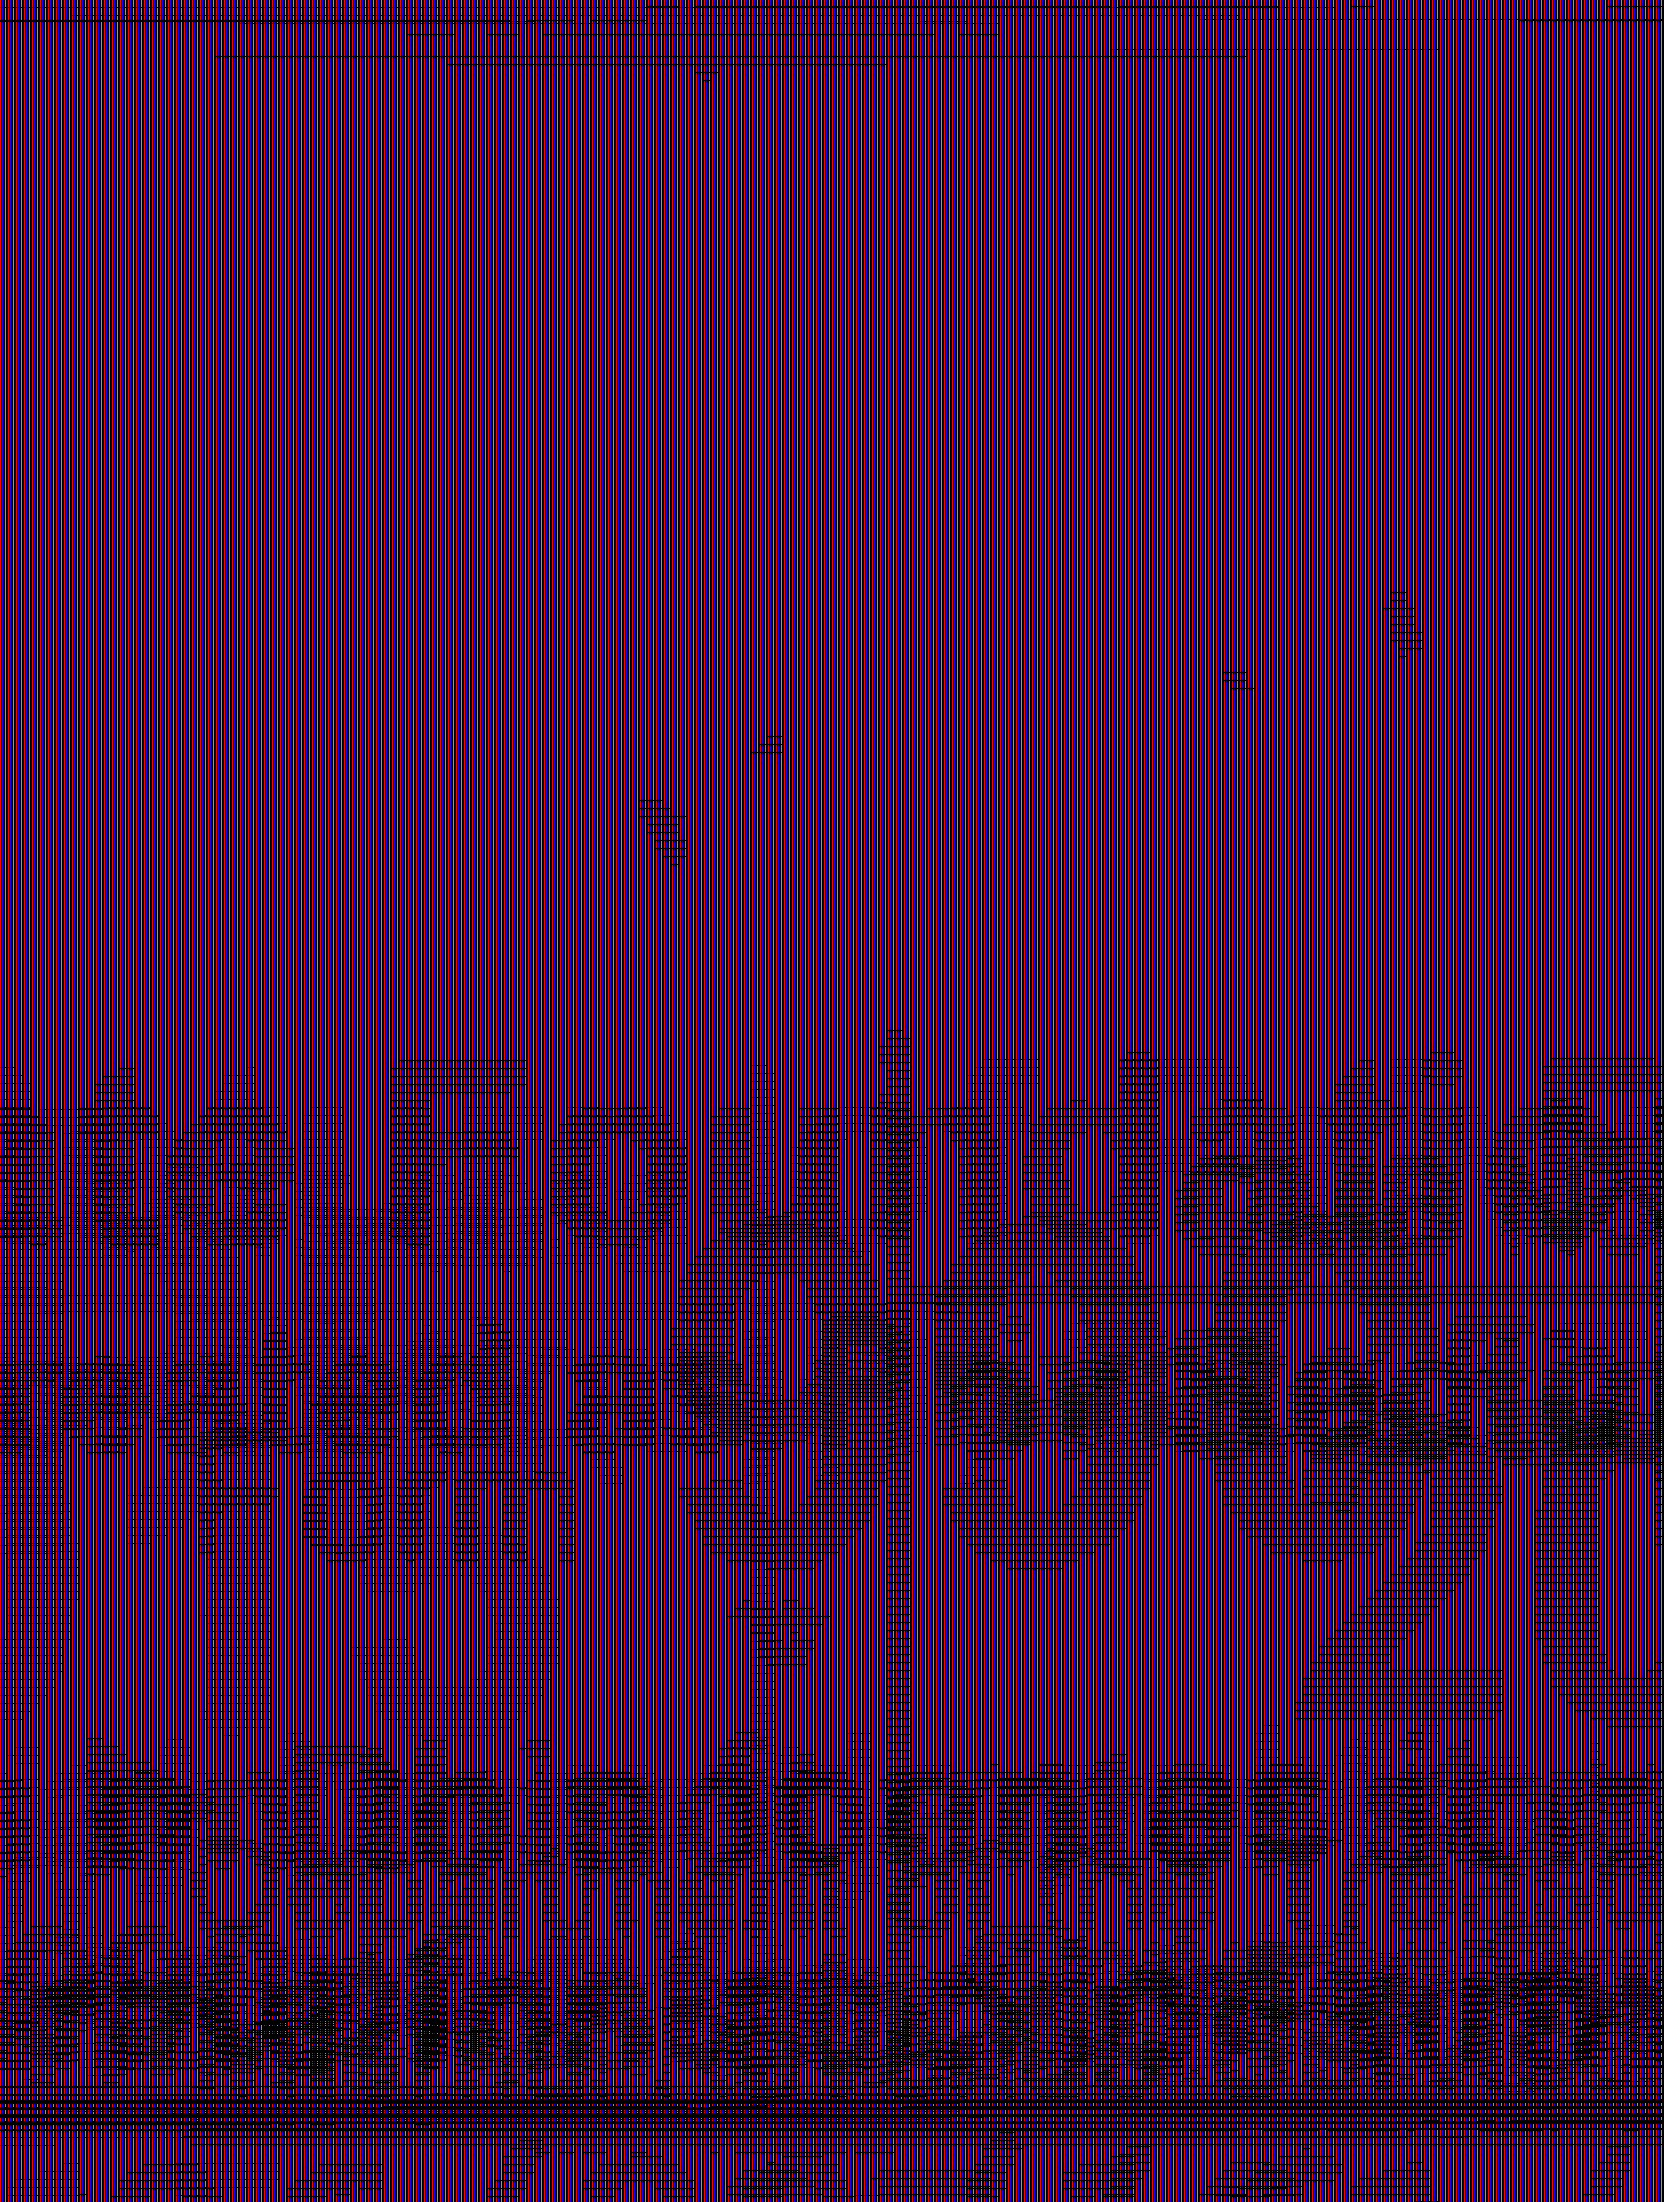

In [121]:
Image.fromarray(image, 'RGB')

In [112]:
# p = np.full((pixels.shape[0], pixels.shape[1], 3),dtype=object, fill_value=1)
# p.shape
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [113]:
pixels

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]